## Простой анализ данных.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import folium

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")

### Задача 2

<a target="_blank" href="https://www.yelp.com/">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

![Yelp_Logo_No_Outline_Color.jpg](attachment:Yelp_Logo_No_Outline_Color.jpg)

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>, но использовать нужно выданные данные.

_____________

**Что нужно сделать:**

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.


*Далее в условии встречаются различные подсказки, как можно выполнить определенные части задачи. Вы можете их игнорировать и делать иным способом для получения **того же самого промежуточного результата**. Однако, если ваше решение окажется **значительно** менее эффективным (по скорости, количеству и красоте кода) по сравнению с предполагаемым, баллы могут быть снижены.*

------

#### 1. Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [ ]:
data_set = pd.read_csv("yelp_business.csv")
data_set.head()

FileNotFoundError: [Errno 2] No such file or directory: 'yelp_business.csv'

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [ ]:
top_cities = data_set.groupby('city').size().sort_values(ascending=False).reset_index(name='count companes')
top_cities.head()

,city,count companes
0,Las Vegas,26775
1,Phoenix,17213
2,Toronto,17206
3,Charlotte,8553
4,Scottsdale,8228


Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

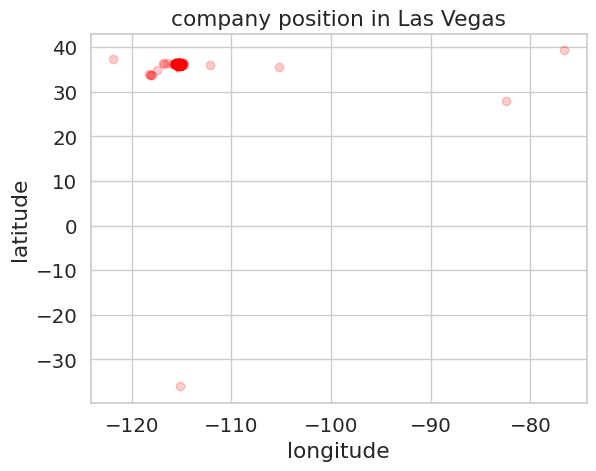

In [ ]:
more_popular_city = top_cities.iloc[0]['city']
ds_with_popular_city = data_set[data_set['city'] == more_popular_city]

ds_without_nan = ds_with_popular_city.dropna(subset=['latitude', 'longitude'])

plt.scatter(ds_without_nan['longitude'], ds_without_nan['latitude'], alpha=0.2, c='red')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title(f'company position in {more_popular_city}')
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы.

### <span style="color:blue"> Coment <span>
<span style="color:green">
Как мы могли заметить, что предыдущий график очень неинформативный, так как в нем присутствуют кампании которые находятся далеко за пределами самого Las Vegas, но при этом официально относятся к территории Las Vegas. В этом разделе я отобрал только компании которые находятся на radius от среднего значения координат всех кампаний. Тоесть я построил круг с <mark style="background-color: lightblue">radius</mark> и центром в <mark style="background-color: lightblue">(mean_lotitude, mean_logitude)</mark> и отобрал только кампании попадающие в этот круг
<span>

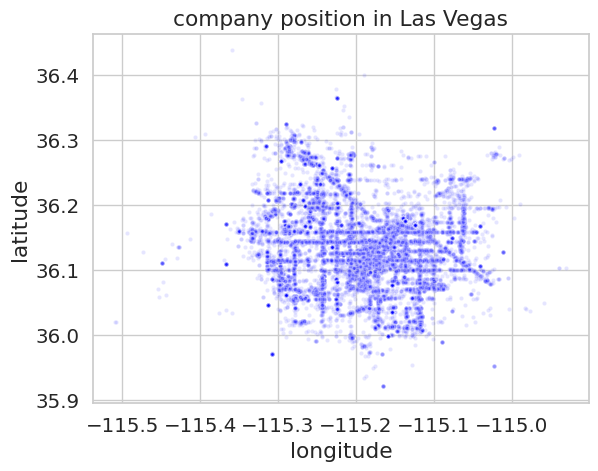

In [ ]:
radius = 0.15

mean_lotitude = ds_without_nan['latitude'].mean()
mean_logitude = ds_without_nan['longitude'].mean()

ds_without_nan['dist to center'] = (ds_without_nan['longitude'] - mean_logitude)**2 + (ds_without_nan['latitude'] - mean_lotitude)**2

ds_without_nan = ds_without_nan[ds_without_nan['dist to center'] < radius]

plt.scatter(ds_without_nan['longitude'], ds_without_nan['latitude'], alpha=0.1, c='blue', edgecolors='white', marker='.')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title(f'company position in {more_popular_city}')
plt.show()

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб, и его не получится отправить боту. В любом случае **<u>необходимо сохранить карту в html и отправить ее отдельным файлом в бот.</u>** При этом каждый файл html должен не превышать 20 Мб, присылать файлы в архиве нельзя. Аналогично со всеми следующими интерактивными графиками в этом задании.

### <span style="color:blue"> Coment </span>
<span style="color:green">
В этой ячейке я строю карту используя folium и сохраняю результат в map_city.html <br>
Отображение карты занимает очень много времени, поэтому я вынес его в отдельную ячейку, для того чтобы не перезапускать этотот долгий процесс
</span>

In [ ]:
# city_coordinates = ds_without_nan[['latitude', 'longitude']]

# map_city = folium.Map(location=[mean_lotitude, mean_logitude], zoom_start=12)

# for index, row in ds_without_nan.iterrows():
#     folium.Marker([row['latitude'], row['longitude']]).add_to(map_city)

# map_city.save('map_city.html')

fig = px.scatter_mapbox(ds_without_nan, lat="latitude", lon="longitude", zoom=12)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(title="карта Las Vegas")

map_las_vegas = folium.Map(location=[mean_logitude, mean_lotitude], zoom_start=12)

for index, row in ds_without_nan.iterrows():
    folium.Marker([row["latitude"], row["longitude"]]).add_to(map_las_vegas)


fig.show()

# las_vegas_map.save("map.html")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Если все получилось, вы молодцы! Далее в этой задаче тоже стройте интерактивные карты. Если нет желания разбираться с интерактивными графиками, можно построить статичные, но баллы будут снижены.

#### 2. Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [ ]:
review_df = pd.read_csv("yelp_review.csv")
review_df.head()

,Unnamed: 0,business_id,stars
0,0,AEx2SYEUJmTxVVB18LlCwA,5
1,1,VR6GpWIda3SfvPC-lg9H3w,5
2,2,CKC0-MOWMqoeWf6s-szl8g,5
3,3,ACFtxLv8pGrrxMm6EgjreA,4
4,4,s2I_Ni76bjJNK9yG60iD-Q,4


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`.

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

### <span style="color:blue"> Coment <span>
<span style="color:green">
Тут я merge ве таблички по bisiness_id в одну, потом фильтрую по городу и ресечу индексы обратно <br>
По итогу получаю табличку в которой хранятся и оценки и сами компании, причем только из Las Vegasа
<span>

In [ ]:
review_df.set_index('business_id', inplace=True)
df_merged = review_df.merge(data_set, on='business_id')
df_las_vegas = df_merged.loc[df_merged['city'] == 'Las Vegas']
df_las_vegas.reset_index(inplace=True)
print(df_las_vegas.shape)
df_las_vegas.head()

(1604227, 15)


,index,business_id,Unnamed: 0_x,stars,Unnamed: 0_y,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,662,8QWPlVQ6D-OExqXoaD2Z1g,5,5,171138,"""Vegas Pub Crawler""",Downtown,"""201 N 3rd St""",Las Vegas,NV,89101,36.171869,-115.142146,1,Pubs;Bars;Bar Crawl;Tours;Nightlife;Hotels & T...
1,663,8QWPlVQ6D-OExqXoaD2Z1g,16786,4,171138,"""Vegas Pub Crawler""",Downtown,"""201 N 3rd St""",Las Vegas,NV,89101,36.171869,-115.142146,1,Pubs;Bars;Bar Crawl;Tours;Nightlife;Hotels & T...
2,664,8QWPlVQ6D-OExqXoaD2Z1g,197712,5,171138,"""Vegas Pub Crawler""",Downtown,"""201 N 3rd St""",Las Vegas,NV,89101,36.171869,-115.142146,1,Pubs;Bars;Bar Crawl;Tours;Nightlife;Hotels & T...
3,665,8QWPlVQ6D-OExqXoaD2Z1g,292022,5,171138,"""Vegas Pub Crawler""",Downtown,"""201 N 3rd St""",Las Vegas,NV,89101,36.171869,-115.142146,1,Pubs;Bars;Bar Crawl;Tours;Nightlife;Hotels & T...
4,666,8QWPlVQ6D-OExqXoaD2Z1g,351244,5,171138,"""Vegas Pub Crawler""",Downtown,"""201 N 3rd St""",Las Vegas,NV,89101,36.171869,-115.142146,1,Pubs;Bars;Bar Crawl;Tours;Nightlife;Hotels & T...


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок.

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

### <span style="color:blue"> Coments <span>
<span style="color:green">
В этом разделе я сначало посчитал среднюю оценку и количество оценок для каждой компании, потом отсортировал компании по убыванию оценок и вывел голову и хвост получившегося датасета. <br>
После чего я построил графики для отображения распределения средних оценок и зависимостей количество оценок от средней оценки
<span>

In [ ]:
average_mark_df = df_las_vegas.groupby('business_id')['stars'].aggregate(['mean', 'size']).reset_index()
average_mark_df.sort_values(['mean'], inplace=True, ascending=False)
average_mark_df.head()

,business_id,mean,size
3237,6qVc33e9KRAYEfoieio0cQ,5.0,3
2748,5hEQ9-chD1kQlbQJ0gTj8w,5.0,4
22856,qlugM5IFpL1sgp27KiFTqg,5.0,3
22854,qlovSyVGdRXZTBYyk-lfqQ,5.0,5
7357,GeNNsLlE0hyQlmWet39Ntw,5.0,7


In [ ]:
average_mark_df.tail()

,business_id,mean,size
16949,cb_NbMbQQ9Uvq1-04YBavg,1.0,5
24032,tj2R64B3hkrVJphSQAbXbg,1.0,4
11209,PwItNJVtXngqbotmL04YKw,1.0,3
20625,lYBVnt_6-kmyUQXJufAynw,1.0,3
6213,E-iJqIFaKUKA8-NOrmOAvw,1.0,3


Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

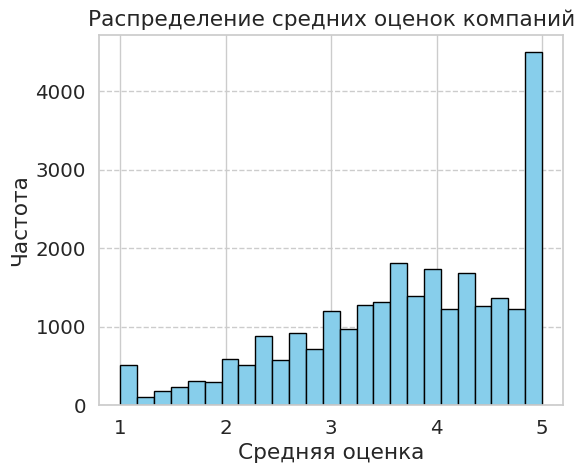

In [ ]:
plt.figure(figsize=(6, 5))
plt.hist(average_mark_df['mean'], bins=25, color='skyblue', edgecolor='black')
plt.title('Распределение средних оценок компаний')
plt.xlabel('Средняя оценка')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()


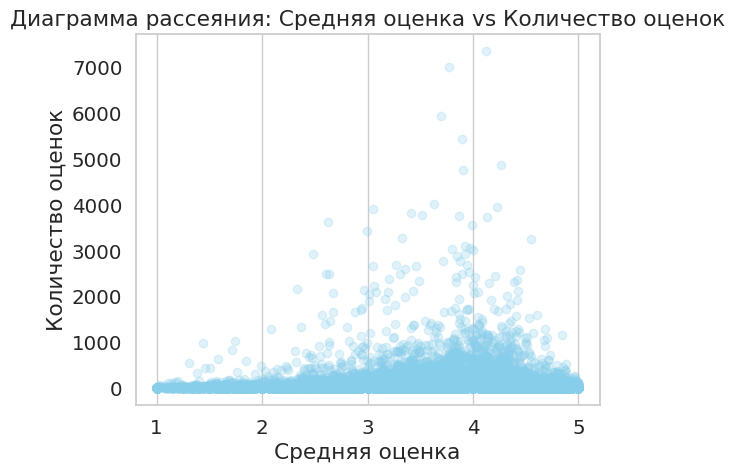

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(average_mark_df['mean'], average_mark_df['size'], color='skyblue', alpha=0.25)
plt.title('Диаграмма рассеяния: Средняя оценка vs Количество оценок')
plt.xlabel('Средняя оценка')
plt.ylabel('Количество оценок')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, а также две колонки со средней оценкой компаний и количеством оценок, которые вы посчитали выше.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [ ]:
lot_and_log_df = ds_without_nan.copy()
marks_df = average_mark_df.copy()

marks_df.reset_index()
marks_df.set_index('business_id', inplace=True)
merged_df = lot_and_log_df.set_index('business_id').join(marks_df)

merged_df.reset_index(inplace=True)

finall_df = merged_df[['business_id', 'name', 'latitude', 'longitude', 'mean', 'size']]
finall_df

,business_id,name,latitude,longitude,mean,size
0,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",36.207430,-115.268460,4.000000,5
1,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",36.197484,-115.249660,1.444444,9
2,VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",36.085051,-115.119421,4.739130,23
3,1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",36.056382,-115.269332,4.450000,20
4,DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",36.105196,-115.056880,3.680000,25
...,...,...,...,...,...,...
26720,swjz4q8gI79Ndg4APuHEUA,"""Stonegate Real Estate Services""",36.134355,-115.224462,4.466667,15
26721,pUhU5ohYv65g8B47dTXAKA,"""Starbucks""",36.173589,-115.116779,2.400000,35
26722,sH9WsMj8sNTTSAUWv4UEEg,"""Sprint Store""",36.055130,-115.243488,3.857143,35
26723,9ouC6BpmjFpLfHeQnLQqng,"""9 Dragons Fight Shop""",36.128780,-115.208990,5.000000,5


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$. Если у одной компании несколько филиалов с разными адресами, наносите на график все адреса.

In [ ]:
# plt.figure(figsize=(12, 8))

# min_num_reviews = finall_df['size'].min()
# max_num_reviews = finall_df['size'].max()

# for index, row in finall_df.iterrows():
#     rating_color = (row['avg_rating'] - 1) / 4
#     color = (1-rating_color, rating_color, 0)

#     # Интерполяция для определения прозрачности в зависимости от количества оценок
#     alpha = np.interp(row['num_reviews'], [min_num_reviews, max_num_reviews], [0.1, 0.3])

#     # Нанесение точки на график
#     plt.scatter(row['longitude'], row['latitude'], c=[color], alpha=alpha)

# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Компании на графике')
# plt.grid(True)
# plt.show()

fig = px.scatter_mapbox(
    combined_dataset,
    lat="latitude",
    lon="longitude",
    zoom=10,
    color="stars",
    color_continuous_scale="RdYlGn",
    opacity=0.3,
    hover_name="name",
    hover_data=["stars"],
    mapbox_style="carto-positron",
    title="Интерактивная карта Лас Вегаса с отмеченными точками",
)

fig.update_layout(coloraxis_colorbar=dict(title="Средний рейтинг"))

fig.write_html("las_vegas_map_colored.html")

fig.show()

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района.

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

Для получения средней оценки компаний по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

*Замечание.* В качестве среднего можно было бы посчитать как общее среднее по всем оценкам всех компаний, так и среднее по компаниям их средних оценок. В чем разница этих подходов? Какой из них необходимо использовать в данном случае?

In [ ]:
...

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** <...>

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [ ]:
...

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** <...>

#### 3. Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [ ]:
...

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
...

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>